<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Laboratorio_10_Isabella_Barrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 10 - PARCIAL PARTE 2**

**Nombre del Curso:** Estadística y Probabilidad - 1289

**Nombre Completo:** Isabella Barrera Babilonia

**Correo:** Isabellabb.12@gmail.com

**Código Estudiantil:** T00089189

In [ ]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:
url = 'https://raw.githubusercontent.com/JSEFERINO/Teoria-de-Probabilidad-MEYCD/main/DATOS202460ULTIMOS.csv'
df = pd.read_csv(url, delimiter=';')

# Mostrar las primeras filas
df.head()

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,SEXO,ESTADO_CIVIL,ESTRATO,URBANO,TRANSPORTE,GR_SANGUINEO,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,Femenino,SOLTERO (A),II,Cartagena,Transcaribe,O positivo (O+),BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,Masculino,SOLTERO (A),III,Cartegena,El bus que me deja mas cerca,A positivo (A +),ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,Femenino,SOLTERO (A),III,Cartagena,Transcaribe,O positivo (O+),BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,Masculino,SOLTERO (A),V,Bolivar,Particular,O positivo (O+),MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,Femenino,SOLTERO (A),II,Cartagena,Mototaxi,O positivo (O+),ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO


In [ ]:
# Ver cantidad de estudiantes y variables
print("Cantidad de estudiantes:", df.shape[0])
print("Cantidad de variables:", df.shape[1])

Cantidad de estudiantes: 74
Cantidad de variables: 26


In [ ]:
# Tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   PARCIAL 1                                          74 non-null     float64
 4   PARCIAL 2                                          74 non-null     float64
 5   NRC                                                74 non-null     int64  
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

In [ ]:
# Listar valores únicos de algunas variables
print("Cursos:", df['CURSO'].unique())
print("\nProgramas:", df['PROGRAMA'].unique())
print("\nEstratos:", df['ESTRATO'].unique())
print("\nTransporte:", df['TRANSPORTE'].unique())

Cursos: ['PROBABILIDAD' 'ESTADISTICAI']

Programas: ['F_NEGOCIOS' 'DERECHO' 'MECANICA' 'PSICOLOGÍA' 'C_DATOS' 'SISTEMAS'
 'BIOMEDICA' 'INDUSTRIAL' 'ECONOMIA' 'MECATRONICA' 'NAVAL' 'C_SOCIAL'
 'QUIMICA' 'ELECTRICA' 'CIVIL' 'CONTADURIA']

Estratos: ['II' 'III' 'V' 'I' 'IV' nan]

Transporte: ['Transcaribe' 'El bus que me deja mas cerca' 'Particular' 'Mototaxi'
 'Taxi']


In [ ]:
# Buscar valores faltantes
df[df['ESTRATO'].isna()]

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,SEXO,ESTADO_CIVIL,ESTRATO,URBANO,TRANSPORTE,GR_SANGUINEO,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
17,PROBABILIDAD,80,75,2.3,2.35,2314,ECONOMIA,19,65,172,Masculino,SOLTERO (A),NaN,cartagena,Mototaxi,O positivo (O+),BAJO,BAJO,BAJO,ALTO,BAJO,BAJO,BAJO,MEDIO,ALTO,BAJO


In [ ]:
# Reemplazar valor faltante en 'ESTRATO' por 'II'
df['ESTRATO'].fillna('II', inplace=True)
df['ESTRATO'].unique()

array(['II', 'III', 'V', 'I', 'IV'], dtype=object)

In [ ]:
# Simplificar categorías largas
df['TRANSPORTE'] = df['TRANSPORTE'].replace(
    {'El bus que me deja más cerca': 'Bus'}
)
df['TRANSPORTE'].unique()

array(['Transcaribe', 'El bus que me deja mas cerca', 'Particular',
       'Mototaxi', 'Taxi'], dtype=object)

In [ ]:
# En esta versión del laboratorio, la variable 'TIPO_SANGRE' no está incluida en la base de datos.
# Por lo tanto, esta celda se deja en blanco o comentada.

# Ejemplo (solo si existiera la variable):
# df['TIPO_SANGRE'].replace({'O POSITIVO': 'OPOS', 'A POSITIVO': 'APOS'}, inplace=True)

print("La variable 'TIPO_SANGRE' no está disponible en esta base de datos.")

La variable 'TIPO_SANGRE' no está disponible en esta base de datos.


In [ ]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,88.243243,86.756757,2.844595,3.114865,1549.851351,18.702703,63.324324,168.391892
std,17.564605,15.112193,0.994112,0.871022,619.364161,1.190484,11.354931,8.533283
min,5.000000,5.000000,0.900000,0.500000,1009.000000,17.000000,42.000000,153.000000
25%,85.000000,80.000000,2.000000,2.900000,1010.000000,18.000000,55.000000,163.000000
50%,90.000000,90.000000,2.850000,3.150000,1136.000000,18.000000,62.000000,168.000000
75%,100.000000,95.000000,3.600000,3.687500,2314.000000,19.000000,70.000000,174.000000
max,100.000000,100.000000,4.900000,4.650000,2314.000000,22.000000,102.000000,192.000000


In [ ]:
# Estadísticas de variables categóricas
df.describe(include=object)

,CURSO,PROGRAMA,SEXO,ESTADO_CIVIL,ESTRATO,URBANO,TRANSPORTE,GR_SANGUINEO,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
count,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
unique,2,16,2,3,5,28,5,4,3,3,3,3,3,3,3,3,3,3
top,PROBABILIDAD,F_NEGOCIOS,Femenino,SOLTERO (A),II,Cartagena,Transcaribe,O positivo (O+),MEDIO,MEDIO,MEDIO,MEDIO,ALTO,ALTO,BAJO,BAJO,ALTO,MEDIO
freq,48,16,42,72,26,17,35,44,27,33,31,32,42,52,30,32,35,33


In [ ]:
df['DEFINITIVA'] = df['PARCIAL 1']
df[['PARCIAL 1', 'DEFINITIVA']].head()

,PARCIAL 1,DEFINITIVA
0,3.6,3.6
1,0.9,0.9
2,3.9,3.9
3,2.9,2.9
4,3.7,3.7


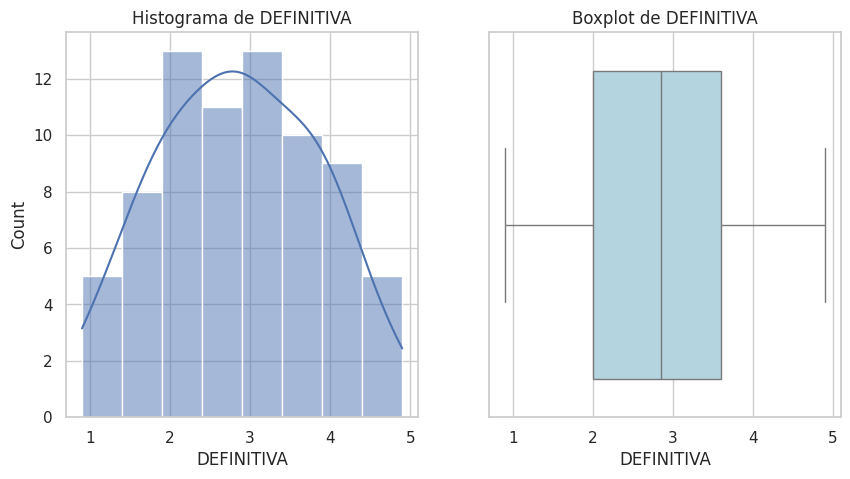

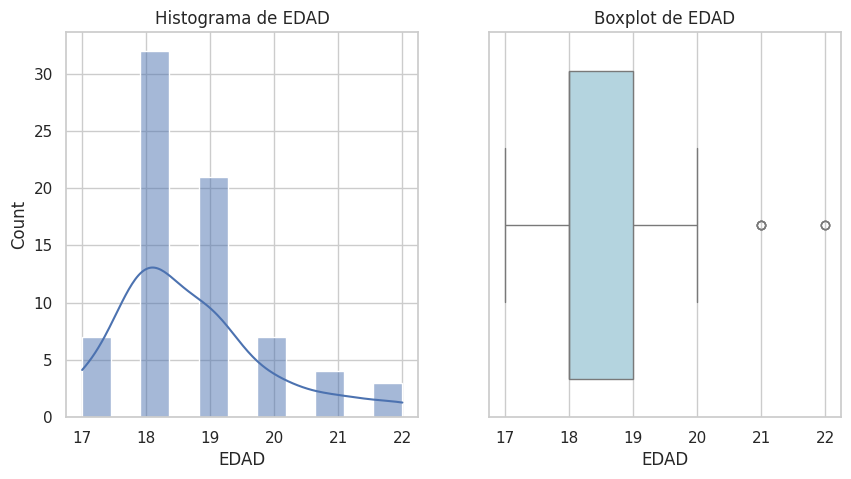

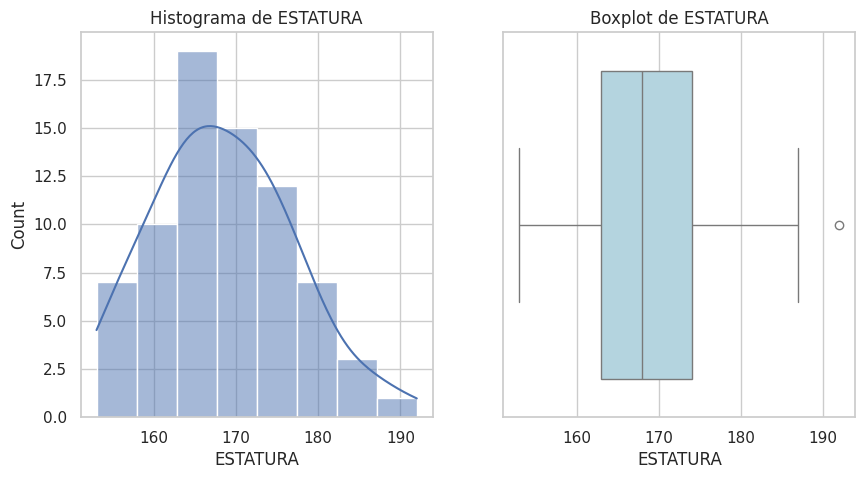

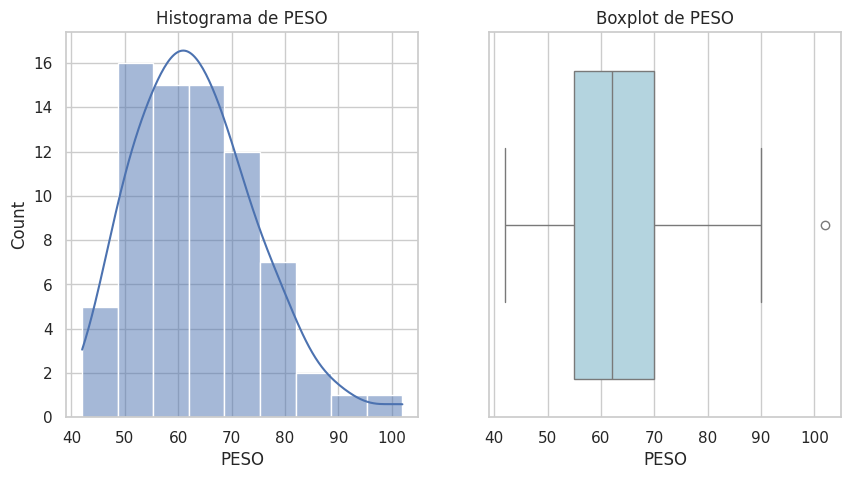

In [ ]:
# Histogramas y Boxplots de variables cuantitativas
variables = ['DEFINITIVA', 'EDAD', 'ESTATURA', 'PESO']

for var in variables:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color='lightblue')
    plt.title(f'Boxplot de {var}')
    plt.show()

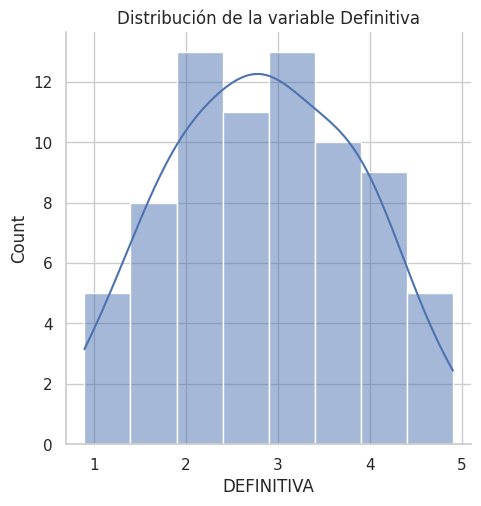

In [ ]:
# Verificación de normalidad (visual)
sns.displot(df['DEFINITIVA'], kde=True)
plt.title('Distribución de la variable Definitiva')
plt.show()

In [ ]:
# Seleccionar muestra aleatoria
muestra = df.sample(50, random_state=42)
muestra.head()

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,SEXO,ESTADO_CIVIL,ESTRATO,URBANO,TRANSPORTE,GR_SANGUINEO,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio,DEFINITIVA
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,Femenino,SOLTERO (A),II,Cartagena,Mototaxi,O positivo (O+),ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO,3.7
63,PROBABILIDAD,90,45,4.0,3.40,1010,F_NEGOCIOS,18,61,163,Femenino,SOLTERO (A),V,Cartagena,Particular,A positivo (A +),MEDIO,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,4.0
18,PROBABILIDAD,85,95,4.4,4.60,2314,SISTEMAS,19,49,158,Femenino,SOLTERO (A),I,Cartagena,Transcaribe,O positivo (O+),ALTO,BAJO,ALTO,MEDIO,MEDIO,ALTO,BAJO,BAJO,MEDIO,BAJO,4.4
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,Femenino,SOLTERO (A),II,Cartagena,Transcaribe,O positivo (O+),BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO,3.6
28,PROBABILIDAD,90,65,3.2,1.80,1010,F_NEGOCIOS,22,73,180,Masculino,SOLTERO (A) CON HIJOS,IV,Cartagena,Mototaxi,B positivo (B +),ALTO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,MEDIO,ALTO,BAJO,3.2


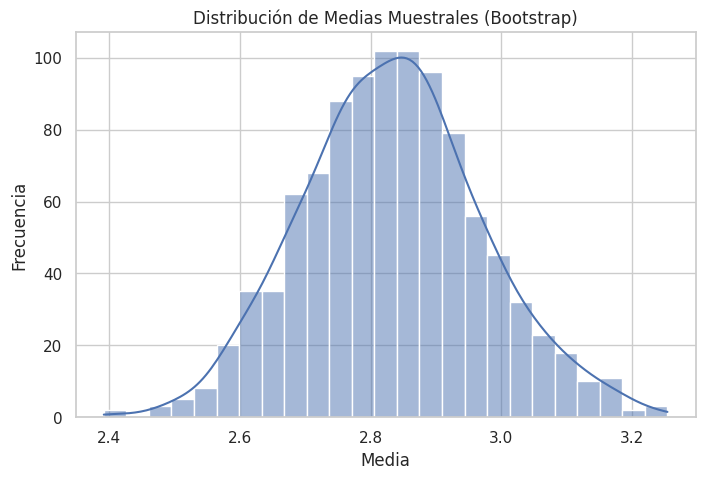

In [ ]:
# Bootstrap de 1000 muestras sobre la variable DEFINITIVA
medias = []
for _ in range(1000):
    sample = df['DEFINITIVA'].sample(50, replace=True)
    medias.append(sample.mean())

plt.figure(figsize=(8,5))
sns.histplot(medias, kde=True)
plt.title('Distribución de Medias Muestrales (Bootstrap)')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   PESO   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     54.99
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           1.88e-10
Time:                        03:20:51   Log-Likelihood:                -263.30
No. Observations:                  74   AIC:                             530.6
Df Residuals:                      72   BIC:                             535.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.1267     19.909     -4.226      0.0

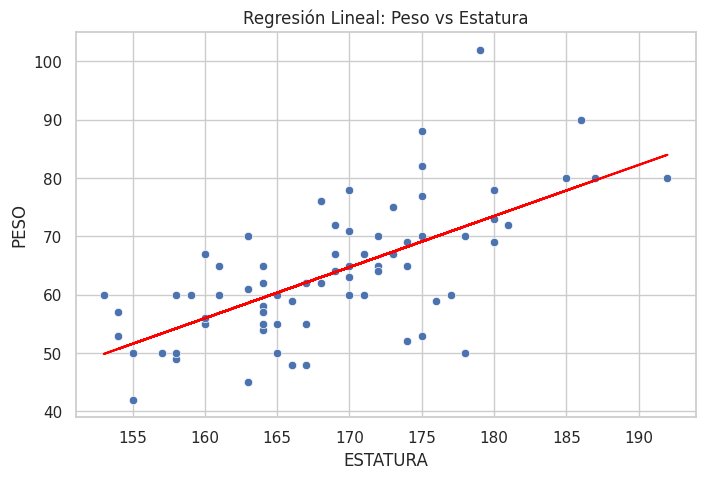

In [ ]:
# Regresión lineal simple entre PESO y ESTATURA
X = df[['ESTATURA']]
y = df['PESO']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

# Visualización
plt.figure(figsize=(8,5))
sns.scatterplot(x='ESTATURA', y='PESO', data=df)
plt.plot(df['ESTATURA'], modelo.predict(X), color='red')
plt.title('Regresión Lineal: Peso vs Estatura')
plt.show()